In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('cookie_cats.csv')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [6]:
df.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


<Axes: >

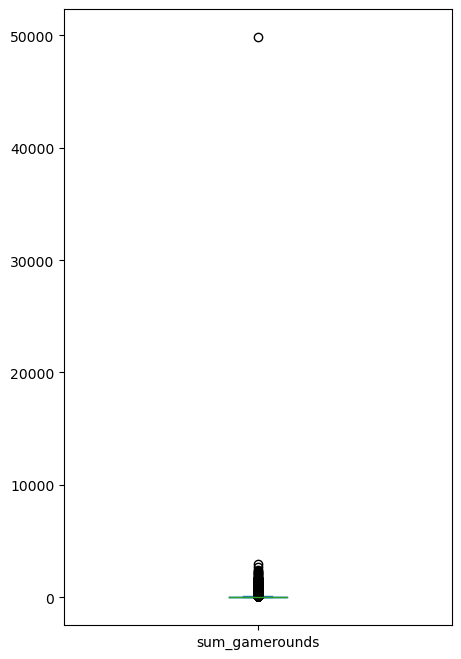

In [7]:
df['sum_gamerounds'].plot.box(figsize = (5,8))

In [9]:
df['sum_gamerounds'].describe()

count    90189.000000
mean        51.872457
std        195.050858
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max      49854.000000
Name: sum_gamerounds, dtype: float64

In [10]:
plot_df = df.groupby('sum_gamerounds')['userid'].count()
plot_df.head(10)

sum_gamerounds
0    3994
1    5538
2    4606
3    3958
4    3629
5    2992
6    2861
7    2379
8    2267
9    2013
Name: userid, dtype: int64

In [11]:
df[df["sum_gamerounds"]== 0]["userid"].count()

3994

Text(0.5, 0, '# Game rounds')

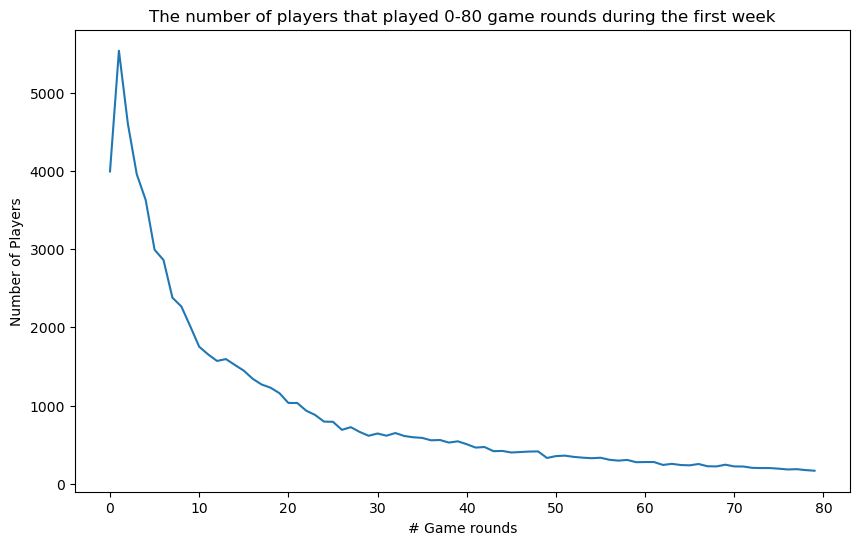

In [12]:
%matplotlib inline

ax = plot_df[:80].plot(figsize=(10,6))
ax.set_title("The number of players that played 0-80 game rounds during the first week")
ax.set_ylabel("Number of Players")
ax.set_xlabel('# Game rounds')

In [13]:
df['retention_1'].sum() / df['retention_1'].count() 

0.4452095044850259

In [17]:
df['retention_7'].sum()/df['retention_7'].count()

0.1860648194347426

In [14]:
df.groupby('version')['retention_1'].mean()

version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64

In [18]:
plot_df = df.groupby('sum_gamerounds')['userid'].count()
plot_df.to_excel('plot_grouped.xlsx', index='true')
plot_df = pd.read_excel('plot_grouped.xlsx')
plot_df.rename(columns = {'userid':'number_of_users'}, inplace = True)
plot_df['percentage_of_total_users'] = plot_df['number_of_users']/90189*100
plot_df['cumulative_percentage'] = plot_df['number_of_users'].cumsum() / plot_df['number_of_users'].sum() * 100
plot_df.percentage_of_total_users= plot_df.percentage_of_total_users.round(2)
plot_df.cumulative_percentage= plot_df.cumulative_percentage.round(2)
plot_df.head(20)

,sum_gamerounds,number_of_users,percentage_of_total_users,cumulative_percentage
0,0,3994,4.43,4.43
1,1,5538,6.14,10.57
2,2,4606,5.11,15.68
3,3,3958,4.39,20.06
4,4,3629,4.02,24.09
5,5,2992,3.32,27.41
6,6,2861,3.17,30.58
7,7,2379,2.64,33.22
8,8,2267,2.51,35.73
9,9,2013,2.23,37.96


<Axes: ylabel='Density'>

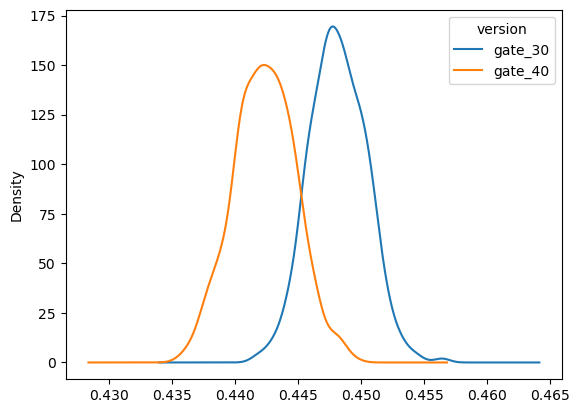

In [24]:
boot_1d = []
for i in range(1000):
    boot_mean = df.sample(frac = 1,replace = True).groupby('version')['retention_1'].mean()
    boot_1d.append(boot_mean)
boot_1d = pd.DataFrame(boot_1d)
boot_1d.plot(kind='density')

Probability that 1-day retention is greater when the gate is at level 30: 0.967


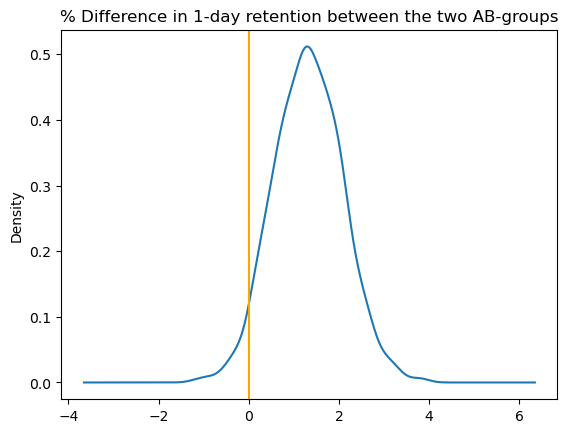

In [25]:
# Adding a column with the % difference between the two AB-groups
boot_1d['diff'] = (boot_1d.gate_30 - boot_1d.gate_40)/boot_1d.gate_40*100

# Ploting the bootstrap % difference
ax = boot_1d['diff'].plot(kind='density')
ax.set_title('% Difference in 1-day retention between the two AB-groups')
plt.axvline(x=0, color='orange')

# Calculating the probability that 1-day retention is greater when the gate is at level 30
print('Probability that 1-day retention is greater when the gate is at level 30:',(boot_1d['diff'] > 0).mean())

<Axes: ylabel='Density'>

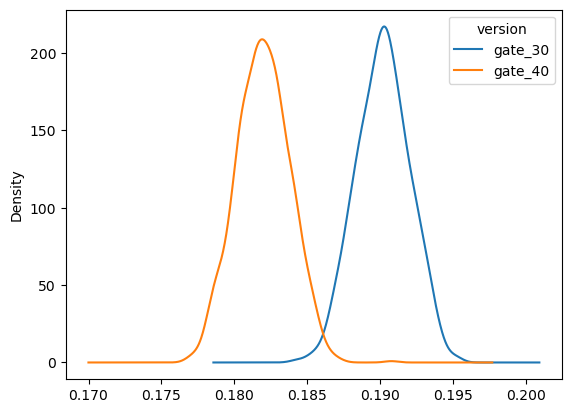

In [28]:
# Creating a list with bootstrapped means for each AB-group
boot_7d = []
for i in range(1000):
    boot_mean = df.sample(frac=1,replace=True).groupby('version')['retention_7'].mean()
    boot_7d.append(boot_mean)

# Transforming the list to a DataFrame
boot_7d = pd.DataFrame(boot_7d)

boot_7d.plot(kind='density')

Probability that 7-day retention is greater when the gate is at level 30: 0.999


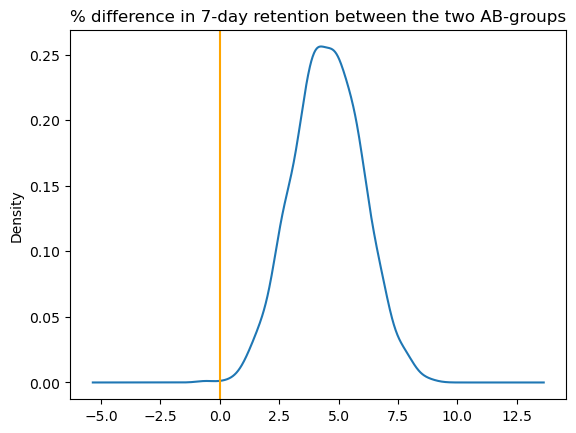

In [29]:
# Adding a column with the % difference between the two AB-groups
boot_7d['diff'] = (boot_7d.gate_30 - boot_7d.gate_40)/boot_7d.gate_40*100

# Ploting the bootstrap % difference
ax = boot_7d['diff'].plot(kind='density')
ax.set_title('% difference in 7-day retention between the two AB-groups')
plt.axvline(x=0,color = 'orange')

# Calculating the probability that 7-day retention is greater when the gate is at level 30
print('Probability that 7-day retention is greater when the gate is at level 30:',(boot_7d['diff'] > 0).mean())